# 1. CommunityCrime -LASSO and Boosting for Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy  
import scikits.bootstrap as bootstrap
import statsmodels.stats.api as sms
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import pandas as pd
from ggplot import *
from scipy import stats
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import Imputer
from scipy.stats import variation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation


%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

c:\python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
c:\python27\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in 

In [2]:
commu_data_all = pd.read_csv('communities_data.csv',na_values='?')
headers = list(commu_data_all)
print type(commu_data_all)
headers = headers[5:]
print len(headers)
#print (headers) 
#headers.insert(0, "communityname string")
#print type(headers) 

<class 'pandas.core.frame.DataFrame'>
123


In [3]:
commu_data_all_string = commu_data_all.iloc[:,0:5]
#print type(commu_data_all_string)
commu_data_all_string_df = commu_data_all_string

commu_data_all_float_df = commu_data_all.drop(['state numeric','county numeric','community numeric','communityname string','fold numeric'], axis=1)

display(commu_data_all_float_df.head())
display(commu_data_all_string_df.head())


print type (commu_data_all_string_df)
print type (commu_data_all_float_df)

,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,racePctHisp numeric,agePct12t21 numeric,agePct12t29 numeric,agePct16t24 numeric,agePct65up numeric,...,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric,ViolentCrimesPerPop numeric
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


,state numeric,county numeric,community numeric,communityname string,fold numeric
0,8,NaN,NaN,Lakewoodcity,1
1,53,NaN,NaN,Tukwilacity,1
2,24,NaN,NaN,Aberdeentown,1
3,34,5.0,81440.0,Willingborotownship,1
4,42,95.0,6096.0,Bethlehemtownship,1


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
#imp = Imputer(missing_values='?', strategy='most_frequent', axis=0)
#imp.fit(commu_data_all)

In [5]:
#commu_data_all[commu_data_all.columns] = Imputer().fit_transform(commu_data_all)

In [6]:
NaNcommu_data_all_float_df_all = commu_data_all_float_df.replace('?', np.NaN)
display(NaNcommu_data_all_float_df_all.head())

,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,racePctHisp numeric,agePct12t21 numeric,agePct12t29 numeric,agePct16t24 numeric,agePct65up numeric,...,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric,ViolentCrimesPerPop numeric
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [7]:
#x = NaNcommu_data_all.fillna(NaNcommu_data_all.mean())

In [8]:
#print (NaNcommu_data_all.mean())
#display(x.head())


In [9]:
import numpy as np
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=float("NaN"), strategy='mean', axis=0)
x = imp.fit_transform(NaNcommu_data_all_float_df_all)

print type(x)
#display(x)
predictors_data_all = pd.DataFrame(x)
predictors_data_all.columns = headers

predictors_data_goal = predictors_data_all.iloc[:,-1]
predictors_data_goal = predictors_data_goal.to_frame()

predictors_data = predictors_data_all.iloc[:,0:122]

display(predictors_data.head())
display(predictors_data_goal.head())

<type 'numpy.ndarray'>


,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,racePctHisp numeric,agePct12t21 numeric,agePct12t29 numeric,agePct16t24 numeric,agePct65up numeric,...,PolicAveOTWorked numeric,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


,ViolentCrimesPerPop numeric
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


In [10]:
cleaned_commu_data =pd.concat([commu_data_all_string_df, predictors_data], axis=1)


In [11]:
display(cleaned_commu_data.head())
cleaned_commu_data.shape

,state numeric,county numeric,community numeric,communityname string,fold numeric,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,...,PolicAveOTWorked numeric,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


(1994, 127)

In [12]:
commu_data_training = predictors_data.iloc[:1495,:]
commu_data_test = predictors_data.iloc[1495:,:]

predictors_data_goal_y_train = predictors_data_goal.iloc[:1495,:]
predictors_data_goal_y_test = predictors_data_goal.iloc[1495:,:]
print type(predictors_data_goal_y_test)
print predictors_data_goal_y_test.shape

display(commu_data_training.head())
commu_data_training.shape

#display (commu_data_training.drop('communityname string'))

<class 'pandas.core.frame.DataFrame'>
(499, 1)


,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,racePctHisp numeric,agePct12t21 numeric,agePct12t29 numeric,agePct16t24 numeric,agePct65up numeric,...,PolicAveOTWorked numeric,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


(1495, 122)

In [13]:
display(commu_data_test.head())
commu_data_test.shape

,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,racePctHisp numeric,agePct12t21 numeric,agePct12t29 numeric,agePct16t24 numeric,agePct65up numeric,...,PolicAveOTWorked numeric,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.305987,0.01,0.23,0.73,0.163103,0.076708,0.698589,0.440439,0.0,0.195078
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.305987,0.01,0.18,0.02,0.163103,0.076708,0.698589,0.440439,0.0,0.195078
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.305987,0.01,0.18,0.00,0.163103,0.076708,0.698589,0.440439,0.0,0.195078
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.305987,0.06,0.13,0.16,0.163103,0.076708,0.698589,0.440439,0.0,0.195078
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.305987,0.03,0.23,0.06,0.163103,0.076708,0.698589,0.440439,0.0,0.195078


(499, 122)

## 1.c - Correlation Matrix - 1

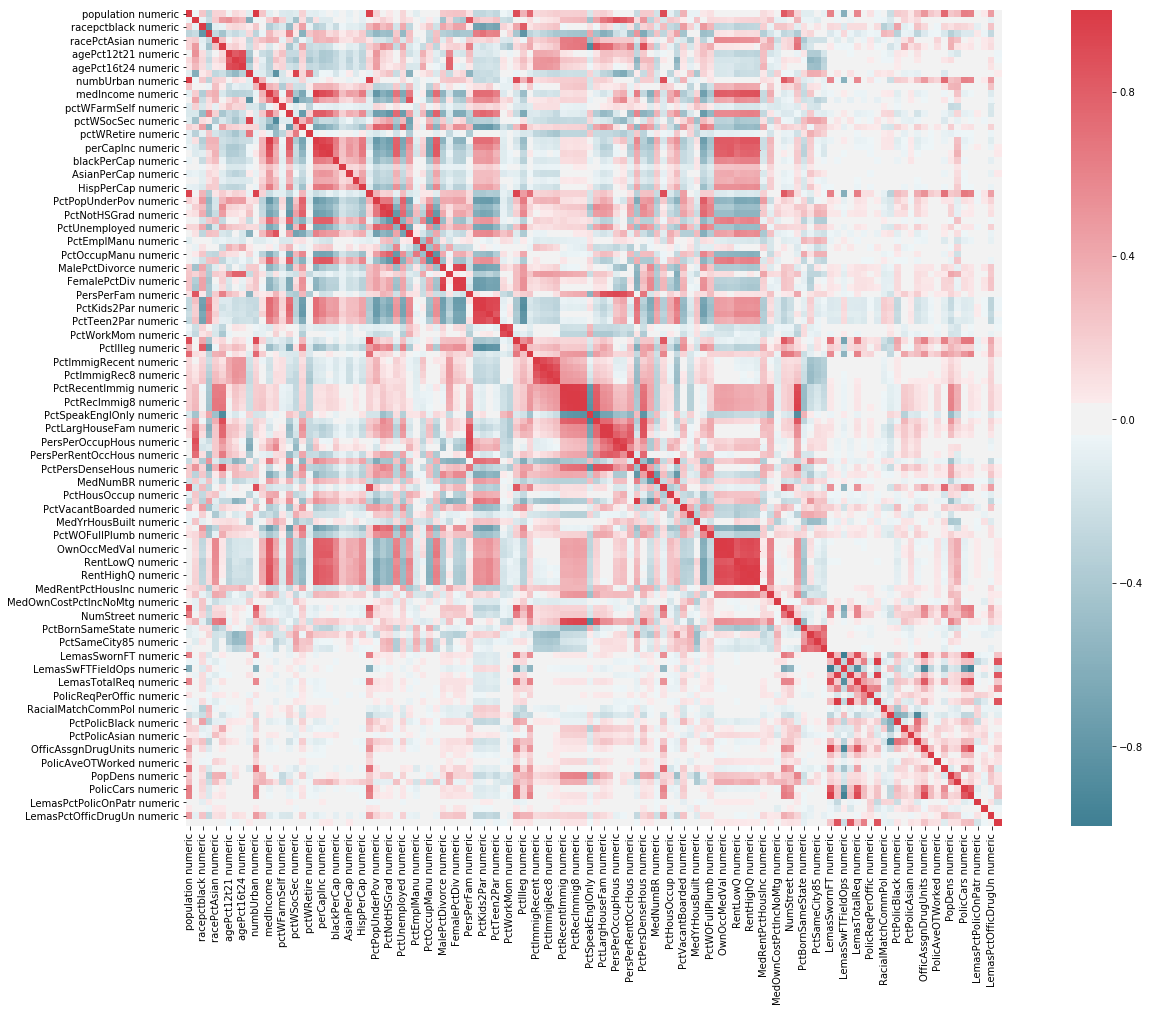

In [14]:
import seaborn as sns

f, ax = plt.subplots(figsize=(25, 15))
corr = commu_data_training.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Correlation Matrix - 2

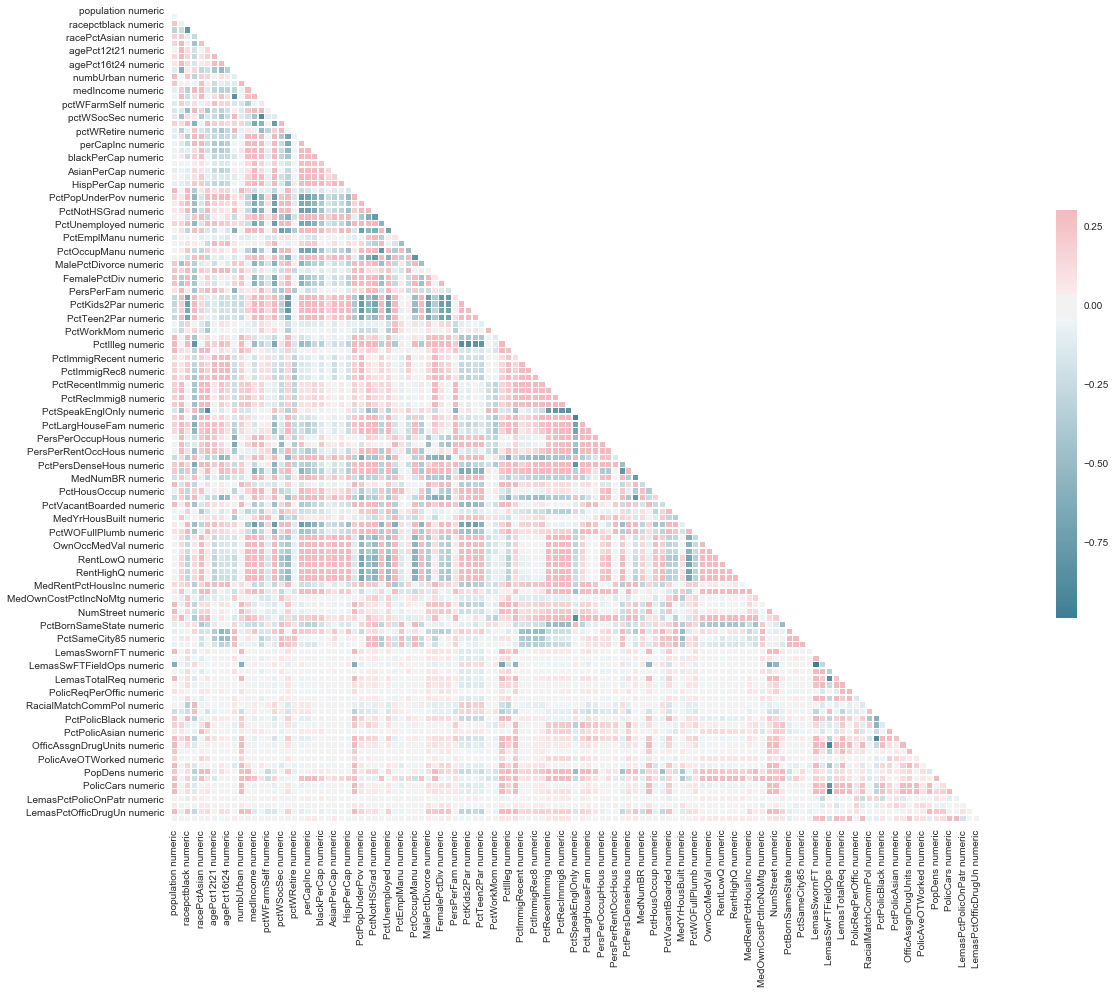

In [15]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = commu_data_training.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 1.d - Coefficient of Variation

In [16]:
features_cv = []
for i in range(0,122):
    each_feature = commu_data_training.iloc[:,i:i+1]
    each_feature=each_feature.values
    #display(each_feature.head())

    cv = variation(each_feature,axis=0)
    a = cv.tolist()
    features_cv.append(a)
    #print total_features_cv
    #display(cv) # from population numeric feature till end
    #print cv
#print features_cv
total_features_cv = sum(features_cv, []) 
total_features_labels = headers[:-1]

In [17]:
features_cv_dict = dict(zip(total_features_labels, total_features_cv))
print features_cv_dict

{'numbUrban numeric': 2.037779618174568, 'HispPerCap numeric': 0.4839060277326521, 'PctPersDenseHous numeric': 1.1325466835532356, 'PctHousOccup numeric': 0.26809179605174727, 'medIncome numeric': 0.5917801462174822, 'NumKindsDrugsSeiz numeric': 0.14348482336889384, 'PctUsePubTrans numeric': 1.3966424222596578, 'PolicOperBudg numeric': 0.7740852997705188, 'PctPolicAsian numeric': 0.725986389638735, 'LemasTotReqPerPop numeric': 0.30931902349966645, 'PctEmplProfServ numeric': 0.40271409407874165, 'OwnOccMedVal numeric': 0.8891124862678086, 'PctPolicMinor numeric': 0.35612226955862475, 'PolicCars numeric': 0.5396421187947114, 'PctPopUnderPov numeric': 0.7542176047790529, 'PctRecImmig10 numeric': 1.2700511245057238, 'PctVacantBoarded numeric': 1.0544744940040371, 'PctBSorMore numeric': 0.5924815811422951, 'MedYrHousBuilt numeric': 0.4706046025944736, 'agePct65up numeric': 0.4126379005920212, 'pctWRetire numeric': 0.3453054120343088, 'pctWFarmSelf numeric': 0.7016630853607426, 'LemasGangUni

## 1.e- 11 Features with highest CV :

In [18]:
a1_sorted_keys = sorted(features_cv_dict, key=features_cv_dict.get, reverse=True)[:11]
a1_sorted_values = []
for r in a1_sorted_keys:
    a1_sorted_values.append(features_cv_dict[r])
    print r, features_cv_dict[r]
     

NumStreet numeric 4.29148698912
NumInShelters numeric 3.46979109196
NumIlleg numeric 3.05794111107
NumImmig numeric 2.92565627478
LemasPctOfficDrugUn numeric 2.55209154097
NumUnderPov numeric 2.34165955938
population numeric 2.24035496588
numbUrban numeric 2.03777961817
HousVacant numeric 1.96780858882
LandArea numeric 1.64485746453
racePctHisp numeric 1.61155175417


In [19]:
print a1_sorted_keys
print a1_sorted_values

['NumStreet numeric', 'NumInShelters numeric', 'NumIlleg numeric', 'NumImmig numeric', 'LemasPctOfficDrugUn numeric', 'NumUnderPov numeric', 'population numeric', 'numbUrban numeric', 'HousVacant numeric', 'LandArea numeric', 'racePctHisp numeric']
[4.291486989120396, 3.4697910919591677, 3.0579411110718357, 2.925656274779147, 2.552091540968875, 2.341659559375309, 2.240354965879167, 2.037779618174568, 1.9678085888226329, 1.644857464527919, 1.6115517541662485]


### Scatter Plots 

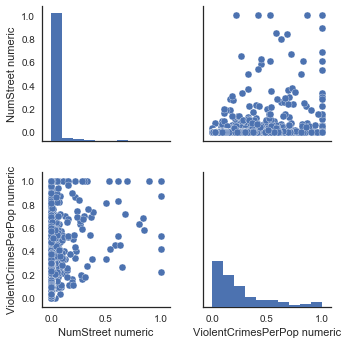

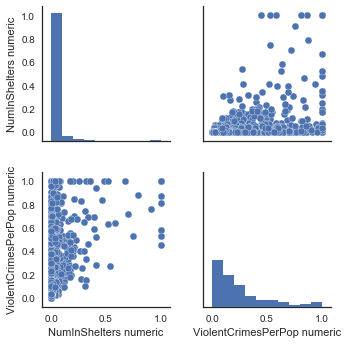

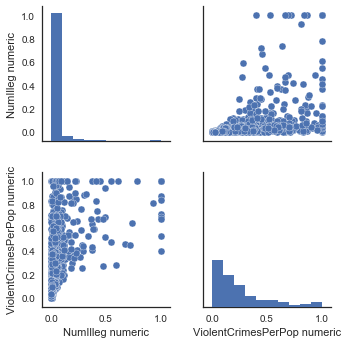

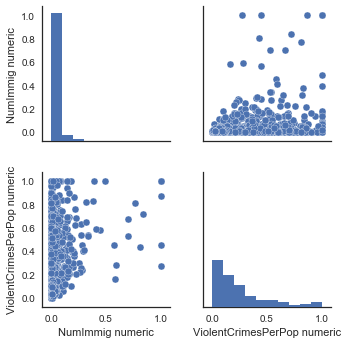

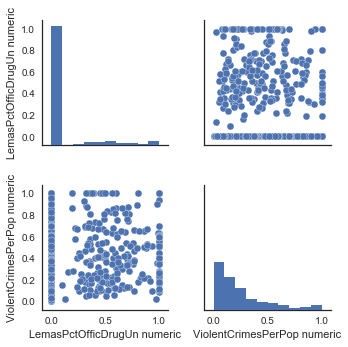

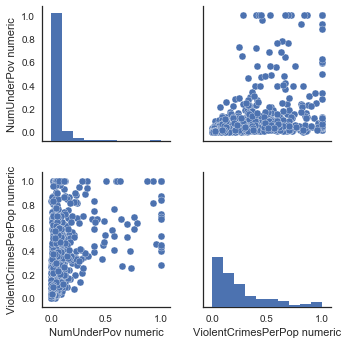

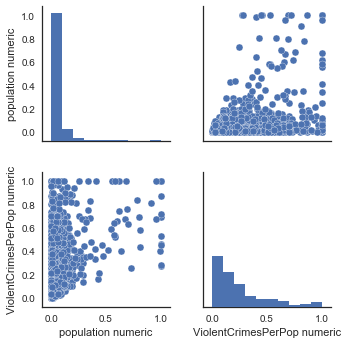

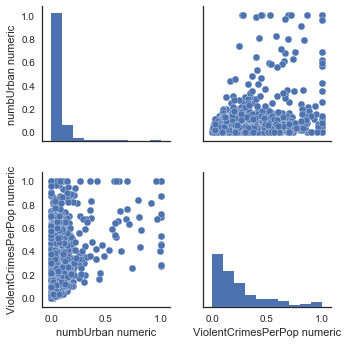

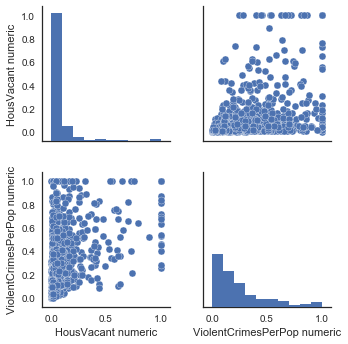

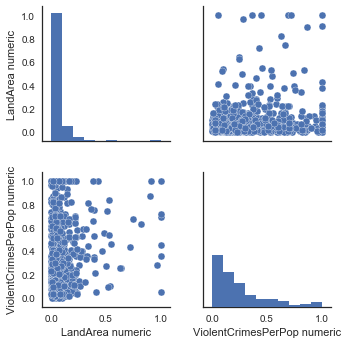

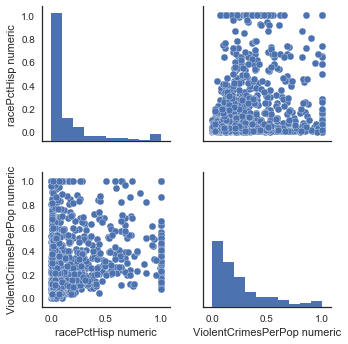

In [20]:
import numpy as np
import matplotlib.pyplot as plt

for i in a1_sorted_keys:
    
    x = commu_data_training[i] 
    y = predictors_data_goal_y_train
    #t = np.arange(123)

    x = x.to_frame()

    pp =pd.concat([x,y], axis=1)
    

    #plt.scatter(x, y)
    g = sns.pairplot(pp)
    plt.show()

In [21]:
pp_list = pd.DataFrame({'x':a1_sorted_keys,'y':a1_sorted_values})
print pp_list

                              x         y
0             NumStreet numeric  4.291487
1         NumInShelters numeric  3.469791
2              NumIlleg numeric  3.057941
3              NumImmig numeric  2.925656
4   LemasPctOfficDrugUn numeric  2.552092
5           NumUnderPov numeric  2.341660
6            population numeric  2.240355
7             numbUrban numeric  2.037780
8            HousVacant numeric  1.967809
9              LandArea numeric  1.644857
10          racePctHisp numeric  1.611552


### Box Plots

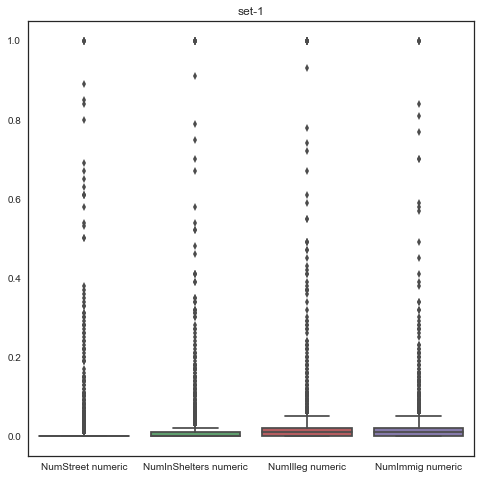

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cols=['NumStreet numeric', 'NumInShelters numeric', 'NumIlleg numeric', 'NumImmig numeric']
set1 = commu_data_training[cols]
xticklablesNV = ['NumStreet numeric', 'NumInShelters numeric', 'NumIlleg numeric', 'NumImmig numeric']
sns.boxplot(data=set1)
ax.set(title="set-1")
ax.set_xticklabels(xticklablesNV)
plt.show()

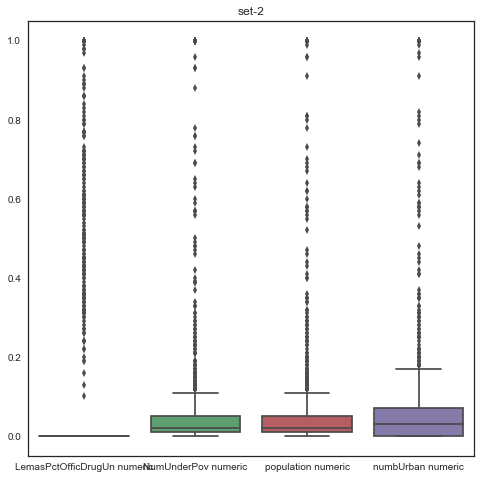

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cols=['LemasPctOfficDrugUn numeric', 'NumUnderPov numeric', 'population numeric', 'numbUrban numeric']
set2 = commu_data_training[cols]
xticklablesNV = ['LemasPctOfficDrugUn numeric', 'NumUnderPov numeric', 'population numeric', 'numbUrban numeric']
sns.boxplot(data=set2)
ax.set(title="set-2")
ax.set_xticklabels(xticklablesNV)
plt.show()


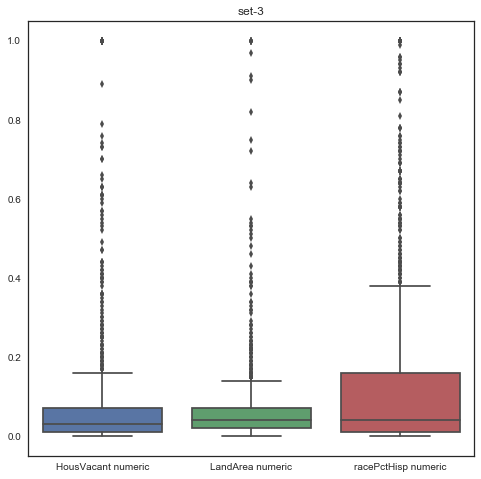

In [24]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cols=['HousVacant numeric', 'LandArea numeric', 'racePctHisp numeric']
set3 = commu_data_training[cols]
xticklablesNV = ['HousVacant numeric', 'LandArea numeric', 'racePctHisp numeric']
sns.boxplot(data=set3)
ax.set(title="set-3")
ax.set_xticklabels(xticklablesNV)
plt.show()


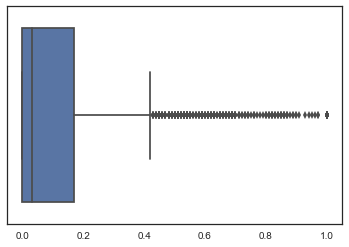

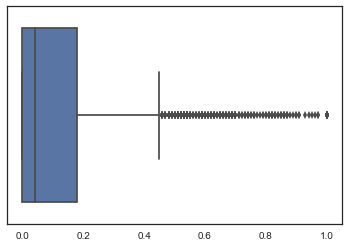

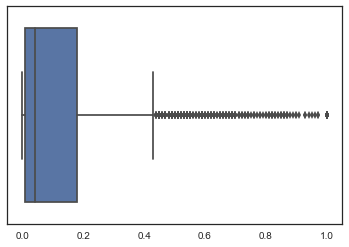

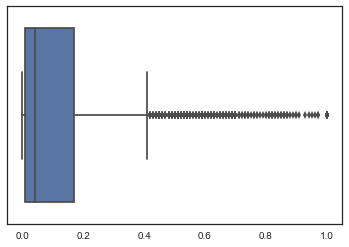

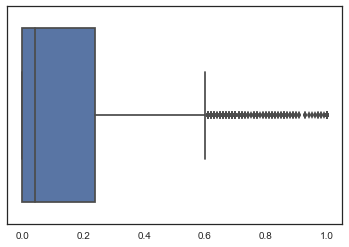

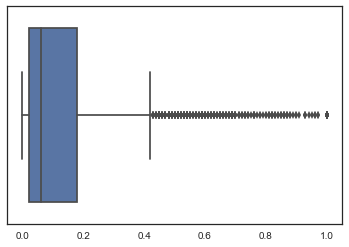

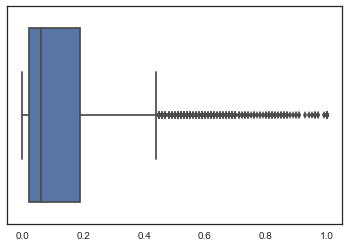

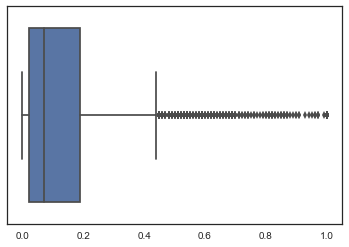

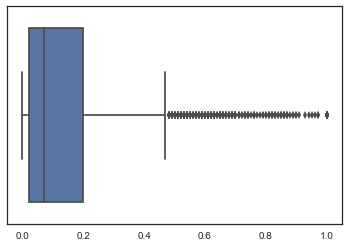

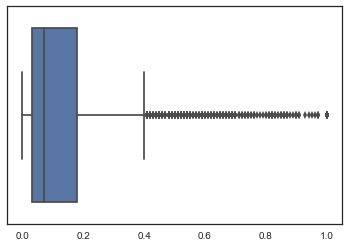

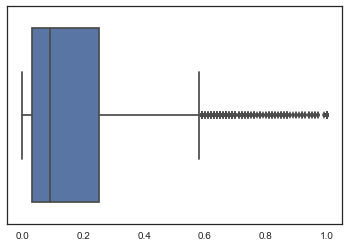

In [25]:
for i in a1_sorted_keys:
    
    x = commu_data_training[i] 
    y = predictors_data_goal_y_train
    #t = np.arange(123)

    x = x.to_frame()

    pp =pd.concat([x,y], axis=1)

    #plt.scatter(x, y)
    g = sns.boxplot(pp)
    #g = sns.boxplot(x =pp[i],y=pp['ViolentCrimesPerPop numeric'],data=pp)
    plt.show()

## 1.f -  LinearRegression

In [26]:
lm = LinearRegression()
#print new.shape
x_train = commu_data_training
y_train = predictors_data_goal_y_train
#print type(y_train)
#print x_train.shape
#print y_train.shape
#print y_train
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:

x_test = commu_data_test
y_test = predictors_data_goal_y_test
#display(x_test.head())
print x_test.shape
print y_test.shape

(499, 122)
(499, 1)


In [28]:
y_pred =lm.predict(x_test)
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

('Coefficients: \n', array([[ 2.13143761e-02, -1.89271223e-02,  2.78983299e-01,
         3.89685109e-03, -2.93051530e-02,  1.10497574e-02,
         1.75324626e-01, -3.45012797e-01, -1.19751657e-01,
         5.61381476e-02, -1.82301243e-01,  4.99625643e-02,
        -1.71644327e-01, -1.37297267e-01,  4.54779925e-02,
        -2.08226531e-01,  1.37417835e-01,  6.15660474e-02,
        -1.23869637e-01,  3.06028422e-01, -4.45852418e-02,
        -1.96920314e-01, -3.96805409e-02, -4.33613714e-02,
         2.98970048e-02,  3.09714952e-02,  3.24953633e-02,
         8.88745268e-02, -2.10272096e-01, -5.15589445e-02,
         2.18042489e-02,  9.98632456e-02,  2.31875943e-02,
         2.90526319e-01, -4.62717180e-02, -9.71560865e-03,
         5.93142880e-02,  5.88516592e-02,  5.25623723e-01,
         2.44825078e-01,  1.84319457e-01, -6.80295252e-01,
        -1.11274746e-01, -4.04617684e-02, -2.05636221e-01,
        -1.70293272e-02, -1.49037221e-02,  5.42928899e-02,
        -2.05649712e-01, -1.1711675

## 1.g - RIDGE REGRESSION

In [29]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(x_train, y_train)
print "Best value for alpha choosen over cross-validation is:  " + str(ridgecv.alpha_)


Best value for alpha choosen over cross-validation is:  0.0466301673441609


In [30]:
reg = linear_model.Ridge (alpha = ridgecv.alpha_)
reg.fit (x_train,y_train) 

Ridge(alpha=0.0466301673441609, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [31]:
print "Ridge regression Coeff:  \n" + str(reg.coef_)


Ridge regression Coeff:  
[[-0.04077452 -0.01668977  0.28501796  0.00911114 -0.02737643  0.01862504
   0.16483167 -0.3428528  -0.11222297  0.05206098 -0.08757362  0.04719112
  -0.1033941  -0.13665633  0.04533881 -0.19354963  0.13100954  0.06068982
  -0.12225709  0.24464891 -0.03901445 -0.20359898 -0.03869227 -0.04182225
   0.02976266  0.03025251  0.03163524  0.05579698 -0.19889279 -0.06550446
   0.03714833  0.09745029  0.0193682   0.28506243 -0.04739365 -0.01374812
   0.06129166  0.05594509  0.34352763  0.24697165 -0.03163303 -0.30385776
  -0.06907883 -0.03650568 -0.20041145 -0.01817829 -0.02101236  0.05066349
  -0.20345933 -0.10006477  0.0683127  -0.12826298  0.00365858  0.02337131
   0.00484926 -0.02781476 -0.0596613  -0.01004518  0.04821084  0.05439776
  -0.03557448 -0.18473322  0.05231708 -0.24000254  0.48294691 -0.08651599
  -0.17416497 -0.51949951  0.29322348  0.11657756  0.02657123  0.17591443
  -0.0470502   0.38907238  0.08426971 -0.08877788 -0.02870453  0.03403532
  -0.0369578

In [32]:
print "Ridge Intercept :   " +str(reg.intercept_)
y_pred = reg.predict(x_test)
#print y_pred
mse = np.mean((y_pred - y_test)**2)
print "Mean Square error :   " + str(mse)
print "Ridge Regression Score:   " + str(reg.score(x_test,y_test))

Ridge Intercept :   [0.43699573]
Mean Square error :   ViolentCrimesPerPop numeric    0.01803
dtype: float64
Ridge Regression Score:   0.6208609551305065


## 1.h - LASSO Regression

In [33]:

lasso = Lasso(max_iter = 10000, normalize = False)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = False)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)

print "LASSO COEFF :\n" + str(lasso.coef_)

c:\python27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LASSO COEFF :
[-0.          0.          0.27249895 -0.         -0.01665789  0.
  0.07109539 -0.27784678  0.          0.0011751  -0.          0.04073145
  0.         -0.08891917  0.02771806 -0.10354325  0.05391932  0.04011279
 -0.10917987  0.         -0.         -0.06268167 -0.0217659  -0.03149086
  0.02913329  0.02311615  0.02483343 -0.         -0.14530918 -0.01971014
  0.          0.00743498 -0.          0.14574506 -0.01741799  0.
  0.01310179  0.          0.12481517  0.14171105 -0.08644452 -0.
  0.         -0.         -0.19722105 -0.03685726 -0.0107591   0.
 -0.13195846 -0.06160317  0.09706191 -0.0750557  -0.         -0.
 -0.         -0.00535548 -0.          0.          0.          0.03847502
  0.         -0.07598984 -0.         -0.07663781  0.05692306 -0.
 -0.         -0.06082072  0.22506971  0.06096321  0.00468589  0.12739235
 -0.05984836  0.          0.07417148 -0.06134435 -0.01607479  0.02542797
 -0.02501277 -0.01552814 -0.         -0.         -0.1619326  -0.
  0.          0.1670

In [34]:
print "LASSO INTERCEPT:" + str(lasso.intercept_)
y_pred_l = lasso.predict(x_test)
#print y_pred_l
y_test = np.array(y_test)
mse_l = np.mean((y_pred_l - y_test)**2)
print "MEAN SQUARE ERROR:" + str(mse_l)
print "LASSO SCORE:" + str(lasso.score(x_test,y_test))

LASSO INTERCEPT:[0.42228093]
MEAN SQUARE ERROR:0.08361866691992706
LASSO SCORE:0.6262327573680131


## LASSO Regression with Normalised Features

In [35]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)

print "LASSO COEFF :\n" + str(lasso.coef_)

LASSO COEFF :
[-0.          0.          0.26704618 -0.         -0.0064159  -0.
  0.07208902 -0.280218    0.          0.         -0.          0.03770419
  0.         -0.07136045  0.02142752 -0.11695994  0.05484934  0.02934848
 -0.10599091  0.         -0.         -0.04945943 -0.02150605 -0.03188527
  0.02685573  0.02054807  0.02245503 -0.         -0.12035315 -0.01147682
  0.          0.         -0.          0.13013334 -0.00625328  0.
  0.         -0.          0.10803272  0.12553389 -0.0664466  -0.
  0.         -0.         -0.19302212 -0.03628345 -0.00896485  0.
 -0.12400954 -0.04637079  0.10581806 -0.09616904 -0.         -0.
 -0.         -0.00348365  0.          0.          0.          0.03110481
  0.         -0.04662156 -0.         -0.04751809  0.03324104 -0.
  0.         -0.05120891  0.19798631  0.05860836  0.00084542  0.1172026
 -0.06039422 -0.          0.06897606 -0.05555312 -0.01363225  0.01106849
 -0.02321572 -0.         -0.         -0.         -0.13070976  0.
  0.          0.12879

In [36]:
print "LASSO INTERCEPT:" + str(lasso.intercept_)
y_pred_l = lasso.predict(x_test)
#print y_pred_l
mse_l = np.mean((y_pred_l - y_test)**2)
print "MEAN SQUARE ERROR:" + str(mse_l)
print "LASSO SCORE:" + str(lasso.score(x_test,y_test))

LASSO INTERCEPT:[0.42875423]
MEAN SQUARE ERROR:0.08348299733538181
LASSO SCORE:0.6251347416963564


## 1.i - PCR

In [37]:
pca = PCA()
X_red = pca.fit_transform(scale(x_train))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 21.21,  35.39,  44.18,  51.08,  56.83,  60.81,  64.17,  67.26,
        69.81,  71.86,  73.56,  75.03,  76.44,  77.78,  79.02,  80.12,
        81.18,  82.09,  82.95,  83.8 ,  84.6 ,  85.35,  86.08,  86.79,
        87.47,  88.1 ,  88.7 ,  89.27,  89.8 ,  90.28,  90.76,  91.22,
        91.65,  92.06,  92.46,  92.84,  93.2 ,  93.55,  93.88,  94.2 ,
        94.51,  94.8 ,  95.08,  95.33,  95.57,  95.81,  96.02,  96.23,
        96.43,  96.61,  96.79,  96.96,  97.12,  97.28,  97.43,  97.57,
        97.7 ,  97.83,  97.96,  98.07,  98.18,  98.29,  98.39,  98.48,
        98.57,  98.65,  98.73,  98.81,  98.88,  98.95,  99.01,  99.07,
        99.13,  99.18,  99.23,  99.28,  99.33,  99.37,  99.41,  99.45,
        99.49,  99.53,  99.56,  99.59,  99.62,  99.65,  99.68,  99.71,
        99.74,  99.76,  99.78,  99.8 ,  99.82,  99.84,  99.86,  99.88,
        99.89,  99.9 ,  99.91,  99.92,  99.93,  99.94,  99.95,  99.96,
        99.97,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
      

#### The initial 50% of the components explain most of the variance in the data.

In [38]:
n = len(X_red)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)

regr = LinearRegression()
mse = []

In [39]:
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [40]:
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_red[:,:i], y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
#print len(mse)

In [41]:
print "PCA Components:  \n" + str(pca.components_)

PCA Components:  
[[ 6.27890215e-02 -5.25348436e-03  1.07610796e-01 ...  8.39759596e-03
   4.98983075e-02  6.15156184e-03]
 [ 1.05398459e-01  1.09635409e-01  6.03540252e-03 ...  9.98255448e-03
   5.66080772e-02  2.29756670e-02]
 [ 1.95802117e-01 -1.58170025e-01  6.67594904e-02 ...  1.16506099e-03
   5.99049016e-02  6.75513176e-02]
 ...
 [-2.38180564e-02 -3.35362895e-03  6.44729151e-03 ...  1.48705359e-04
   2.60834768e-04  4.86496634e-03]
 [ 1.74667169e-02 -3.97465378e-03 -5.09449351e-04 ...  2.61672397e-04
   1.43132110e-03 -2.85164589e-03]
 [-3.04216509e-05  2.93531350e-06  8.45232043e-06 ...  3.18432515e-06
   1.00848983e-04 -8.02244745e-06]]


In [42]:
print "PCA Variance:   \n" +str(pca.explained_variance_)

PCA Variance:   
[2.58905682e+01 1.73059417e+01 1.07363609e+01 8.42630570e+00
 7.01627252e+00 4.86162369e+00 4.10096568e+00 3.77577748e+00
 3.10953789e+00 2.50242367e+00 2.07924366e+00 1.79147972e+00
 1.71591392e+00 1.63748385e+00 1.51312640e+00 1.33949320e+00
 1.29459828e+00 1.11214047e+00 1.04688200e+00 1.04133272e+00
 9.78218116e-01 9.18087660e-01 8.85367341e-01 8.61840264e-01
 8.31815115e-01 7.65078654e-01 7.30676759e-01 6.99505991e-01
 6.44544830e-01 5.83985345e-01 5.81124496e-01 5.65209477e-01
 5.25431149e-01 4.96722693e-01 4.83209741e-01 4.59039834e-01
 4.40788624e-01 4.24891863e-01 4.07155867e-01 3.90697716e-01
 3.74480726e-01 3.54636651e-01 3.47845465e-01 3.05814015e-01
 2.99090205e-01 2.88682189e-01 2.60756397e-01 2.51922933e-01
 2.38263443e-01 2.24578462e-01 2.16222466e-01 2.03236538e-01
 1.96409328e-01 1.93960189e-01 1.79490023e-01 1.72765381e-01
 1.64326653e-01 1.60247999e-01 1.53131810e-01 1.38907176e-01
 1.32307117e-01 1.30878342e-01 1.18822691e-01 1.12728468e-01
 1.0610

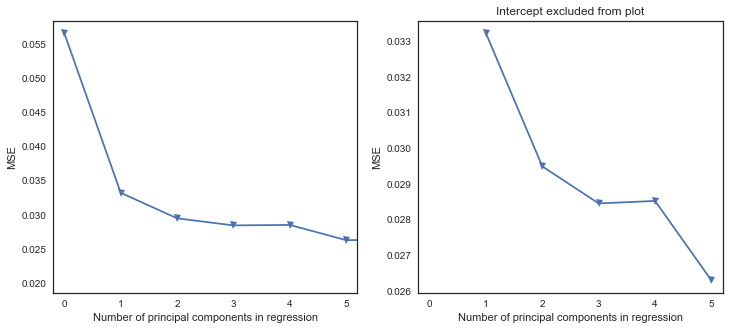

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5], mse[1:6], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,5.2))

## 1.j - L1 penalized gradient boosting tree.

In [ ]:
xgb_model = XGBRegressor(reg_alpha=1,n_jobs=4)

#set reg_alpha for L1 Penalized Regression
xgb_model.fit(x_train, y_train)
y_test=pd.DataFrame(y_test)




In [ ]:
#make predictions for test data
y_pred = xgb_model.predict(x_test)

accuracy = xgb_model.score(x_test, y_test)
print("Accuracy:"+ str(accuracy * 100.0))

In [ ]:
# Regularization term using cross-validation
params = {
 'learning_rate':[0.0, 0.001, 0.005, 0.01, 0.05]
}
gsearch = GridSearchCV(xgb_model,param_grid = params, cv=5)

gsearch.fit(x_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_